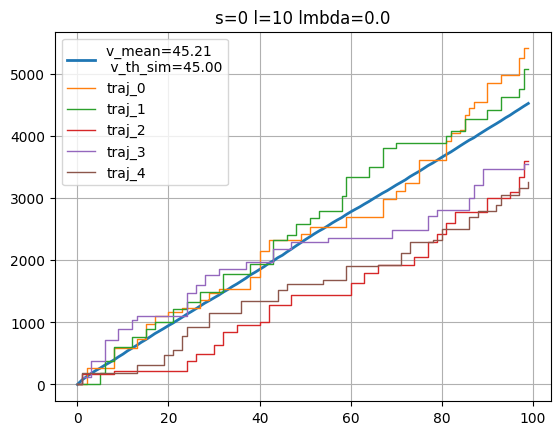

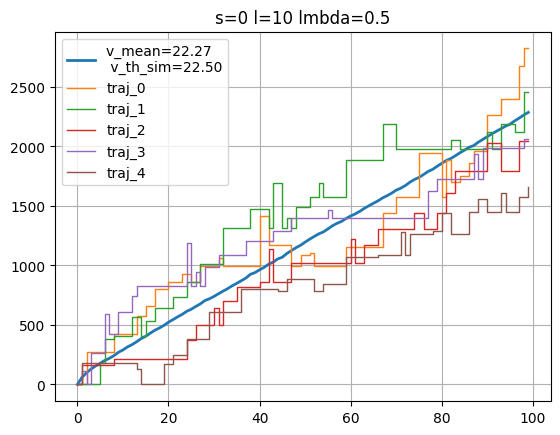

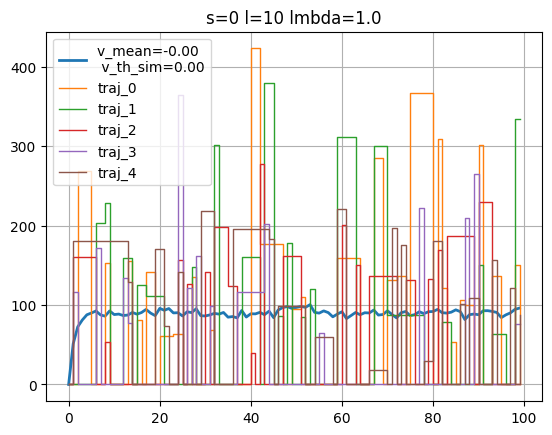

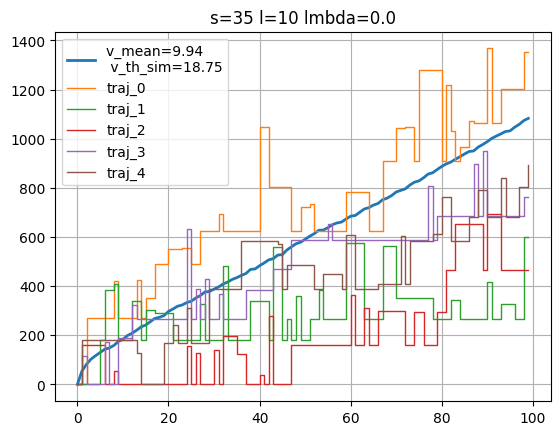

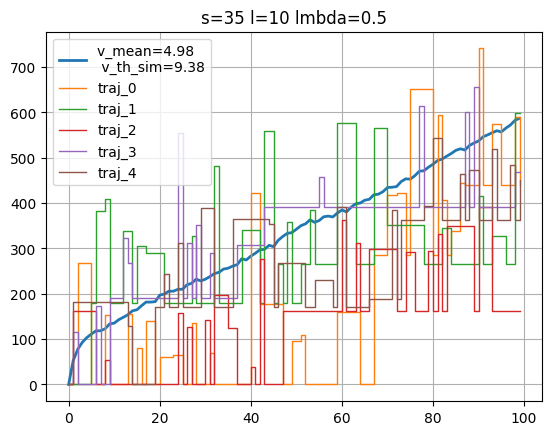

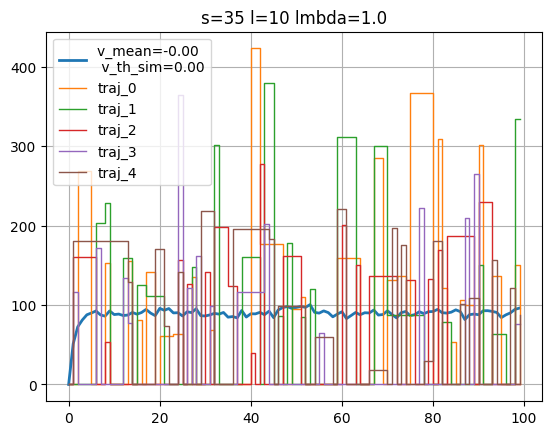

In [ ]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path
from itertools import product


# File
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-05__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)
# print(df_sorted)


# Values

# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t           = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_capt   = df_sorted["rtot_capt"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])


# Plot

# function
def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )

# loop
for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0].to_numpy()
    x_matrix        = df["x_matrix"][0].to_numpy()
    results         = df["results"][0].to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()[0]
    v_mean          = df["v_mean"].to_numpy()[0]
    kB              = df["kB"].to_numpy()[0]
    kU              = df["kU"].to_numpy()[0]
    alphar          = df["alphar"].to_numpy()[0]
    
    plt.figure()
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val} \n kB={kB} kU={kU} alphar={alphar} ")
    plt.plot(results_mean, label=f"v_mean={v_mean:.2f} \n v_th_sim={v_th_sim:.2f}", lw=2)
    for i in range(0,5):
        # plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
        #         label=f"traj_{i}", where="post")
        plt.step(t, results[i], lw= 1,
                label=f"traj_{i}", where="post")
    plt.grid(True)
    plt.legend()
    plt.show()

# .